# GRIP_JULY - 2021  (TASK 5)

# Task Name:- Traffic sign classification/Recognition

# Domain:- Computer Vision and IOT

# Name:- Akash Singh

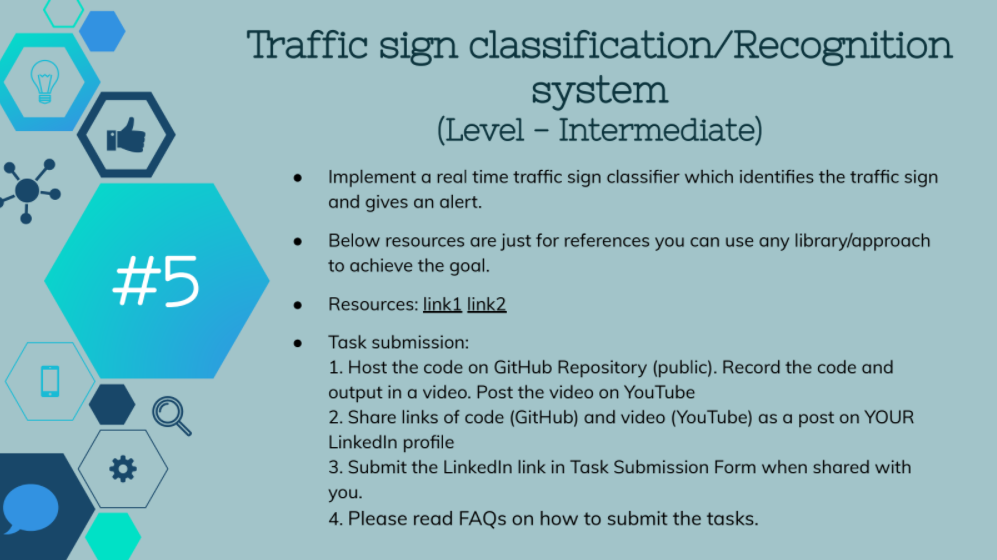

In [ ]:
import cv2
import numpy as np
from scipy.stats import itemfreq


def get_dominant_color(image, n_colors):
    pixels = np.float32(image).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    flags, labels, centroids = cv2.kmeans(
        pixels, n_colors, None, criteria, 10, flags)
    palette = np.uint8(centroids)
    return palette[np.argmax(itemfreq(labels)[:, -1])]


clicked = False
def onMouse(event, x, y, flags, param):
    global clicked
    if event == cv2.EVENT_LBUTTONUP:
        clicked = True


cameraCapture = cv2.VideoCapture(0) 
cv2.namedWindow('camera')
cv2.setMouseCallback('camera', onMouse)

# Read and process frames in loop
success, frame = cameraCapture.read()




while success and not clicked:
    cv2.waitKey(1)
    success, frame = cameraCapture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.medianBlur(gray, 37)
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,
                              1, 50, param1=120, param2=40)

    if not circles is None:
        circles = np.uint16(np.around(circles))
        max_r, max_i = 0, 0
        for i in range(len(circles[:, :, 2][0])):
            if circles[:, :, 2][0][i] > 50 and circles[:, :, 2][0][i] > max_r:
                max_i = i
                max_r = circles[:, :, 2][0][i]
        x, y, r = circles[:, :, :][0][max_i]
        if y > r and x > r:
            square = frame[y-r:y+r, x-r:x+r]

            dominant_color = get_dominant_color(square, 2)
            if dominant_color[2] > 100:
                print("STOP")
            elif dominant_color[0] > 80:
                zone_0 = square[square.shape[0]*3//8:square.shape[0]
                                * 5//8, square.shape[1]*1//8:square.shape[1]*3//8]
                cv2.imshow('Zone0', zone_0)
                zone_0_color = get_dominant_color(zone_0, 1)

                zone_1 = square[square.shape[0]*1//8:square.shape[0]
                                * 3//8, square.shape[1]*3//8:square.shape[1]*5//8]
                cv2.imshow('Zone1', zone_1)
                zone_1_color = get_dominant_color(zone_1, 1)

                zone_2 = square[square.shape[0]*3//8:square.shape[0]
                                * 5//8, square.shape[1]*5//8:square.shape[1]*7//8]
                cv2.imshow('Zone2', zone_2)
                zone_2_color = get_dominant_color(zone_2, 1)

                if zone_1_color[2] < 60:
                    if sum(zone_0_color) > sum(zone_2_color):
                        print("LEFT")
                    else:
                        print("RIGHT")
                else:
                    if sum(zone_1_color) > sum(zone_0_color) and sum(zone_1_color) > sum(zone_2_color):
                        print("FORWARD")
                    elif sum(zone_0_color) > sum(zone_2_color):
                        print("FORWARD AND LEFT")
                    else:
                        print("FORWARD AND RIGHT")
            else:
                print("N/A")

        for i in circles[0, :]:
            cv2.circle(frame, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(frame, (i[0], i[1]), 2, (0, 0, 255), 3)
    cv2.imshow('camera', frame)


cv2.destroyAllWindows()
cameraCapture.release()